In [1]:
from espuma import Case_Directory
import pyvista as pv

In [2]:
of_template = Case_Directory("../templates/first_order_adsorption/adsorptionFoam")
of_case = Case_Directory.clone_from_template(of_template, "_column_case", overwrite=True)

In [3]:
of_case

Case_Directory(/home/edsaac/Repos/cowerc-adsorption/notebooks/_column_case)

In [4]:
of_case.zero.darcyFlux["internalField"]

'uniform ( 0 0 -0.001 )'

In [5]:
of_case.zero.darcyFlux["internalField"] = "uniform (0 0 -2e-3)"

In [6]:
of_case._runCase()

adsorptionFoam finished successfully!


In [7]:
reader = of_case.get_vtk_reader()

In [8]:
reader.active_time_value

0.0

In [9]:
reader.set_active_time_value(60)

In [10]:
mesh = reader.read()
mesh

MultiBlock (0x7f123d20dc60)
  N Blocks:	2
  X Bounds:	0.000, 0.050
  Y Bounds:	0.000, 0.050
  Z Bounds:	0.000, 1.000

In [11]:
internalMesh = mesh["internalMesh"]
boundaries = mesh["boundary"]

In [12]:
internalMesh

UnstructuredGrid (0x7f123d20d540)
  N Cells:    100
  N Points:   404
  X Bounds:   0.000e+00, 5.000e-02
  Y Bounds:   0.000e+00, 5.000e-02
  Z Bounds:   0.000e+00, 1.000e+00
  N Arrays:   8

In [17]:
pv.start_xvfb()
pv.set_jupyter_backend("static")

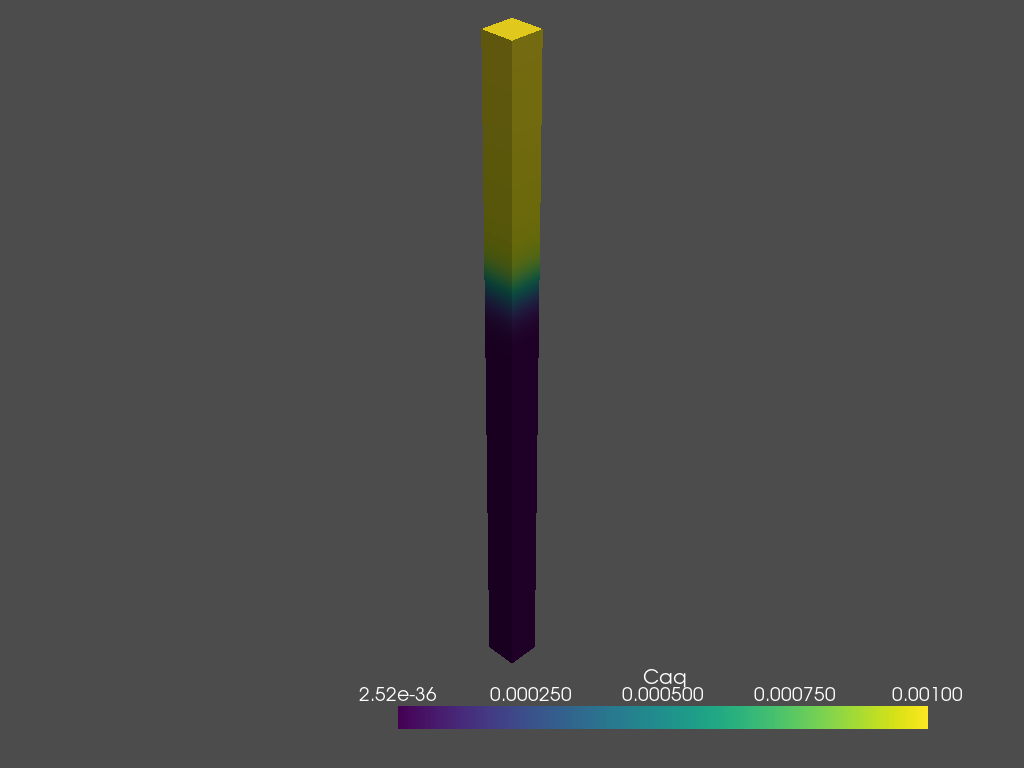

In [18]:
plotter = pv.Plotter()
plotter.add_mesh(internalMesh, scalars="Caq")
plotter.show()